In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../app_dataset.csv')

In [3]:
df.set_index(pd.to_datetime(df['date']), inplace=True)
df.drop(columns='date', inplace=True)
df.sort_index(inplace=True)
df #review changes

,Value_PHILLIPS 66,Value_BP P.L.C.,Value_VALERO ENERGY CORPORATION,Value_CHEVRON CORPORATION,Value_OCCIDENTAL PETROLEUM CORPORATION,Value_MARATHON OIL CORPORATION,Value_PIONEER NATURAL RESOURCES COMPANY,Value_CONOCOPHILLIPS,Value_EXXON MOBIL CORPORATION,Value_MARATHON PETROLEUM CORPORATION,...,lag_i_g_epa,lag_i_g_greenhouse,lag_i_g_hurricane_storm,lag_i_g_pollution,lag_i_g_sanction,lag_i_g_solar,lag_i_g_turbine,lag_i_g_vacation,lag_futures_settle,lag_crude_usd_per_barrel
date,,,,,,,,,,,,,,,,,,,,,
2017-03-22,78.83,33.99,67.57,108.39,63.51,15.02,182.33,44.65,81.76,49.57,...,-0.400000,0.900000,-0.200000,0.000000,0.000000,0.200000,0.000000,-0.475000,47.34,47.02
2017-03-23,78.48,34.06,67.10,107.87,63.04,14.68,181.55,44.48,81.86,49.30,...,0.000000,0.000000,0.000000,-0.066667,-0.200000,0.033333,0.100000,0.300000,48.04,47.29
2017-03-24,77.27,33.78,65.78,107.99,62.83,14.61,180.91,44.10,81.23,48.87,...,0.000000,0.400000,0.000000,-0.200000,-0.700000,0.300000,0.300000,0.000000,47.70,47.00
2017-03-27,77.25,33.75,66.23,106.28,62.87,14.75,180.40,44.29,81.25,48.83,...,-0.600000,0.600000,0.000000,-0.275000,-0.550000,0.000000,0.000000,-0.450000,47.97,47.30
2017-03-28,77.92,33.92,66.29,107.17,63.40,15.23,185.37,45.38,81.84,49.03,...,-0.600000,0.000000,0.000000,-0.200000,-0.350000,0.200000,0.000000,0.600000,47.73,47.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-19,82.31,22.87,71.53,95.80,25.42,9.45,133.94,48.42,52.37,53.00,...,-0.180000,-0.066667,0.000000,-0.287500,-0.428571,-0.040000,-0.568421,-0.100000,60.52,60.40
2021-02-22,83.96,23.63,74.25,98.39,26.47,10.20,139.47,50.88,54.30,54.85,...,-0.400000,-0.283333,0.000000,-0.290909,-0.424138,-0.157143,-0.350000,-0.288000,59.24,59.12
2021-02-23,85.53,24.23,75.81,99.63,26.06,11.16,145.24,52.10,55.05,55.77,...,-0.200000,0.500000,-0.245455,-0.266667,-0.490476,0.071429,-0.300000,-0.117647,61.49,61.67


In [6]:
df = df.resample('W').mean().copy()

In [8]:
targets = ['Value_PHILLIPS 66', 'Value_BP P.L.C.',
       'Value_VALERO ENERGY CORPORATION', 'Value_CHEVRON CORPORATION',
       'Value_OCCIDENTAL PETROLEUM CORPORATION',
       'Value_MARATHON OIL CORPORATION',
       'Value_PIONEER NATURAL RESOURCES COMPANY', 'Value_CONOCOPHILLIPS',
       'Value_EXXON MOBIL CORPORATION', 'Value_MARATHON PETROLEUM CORPORATION']

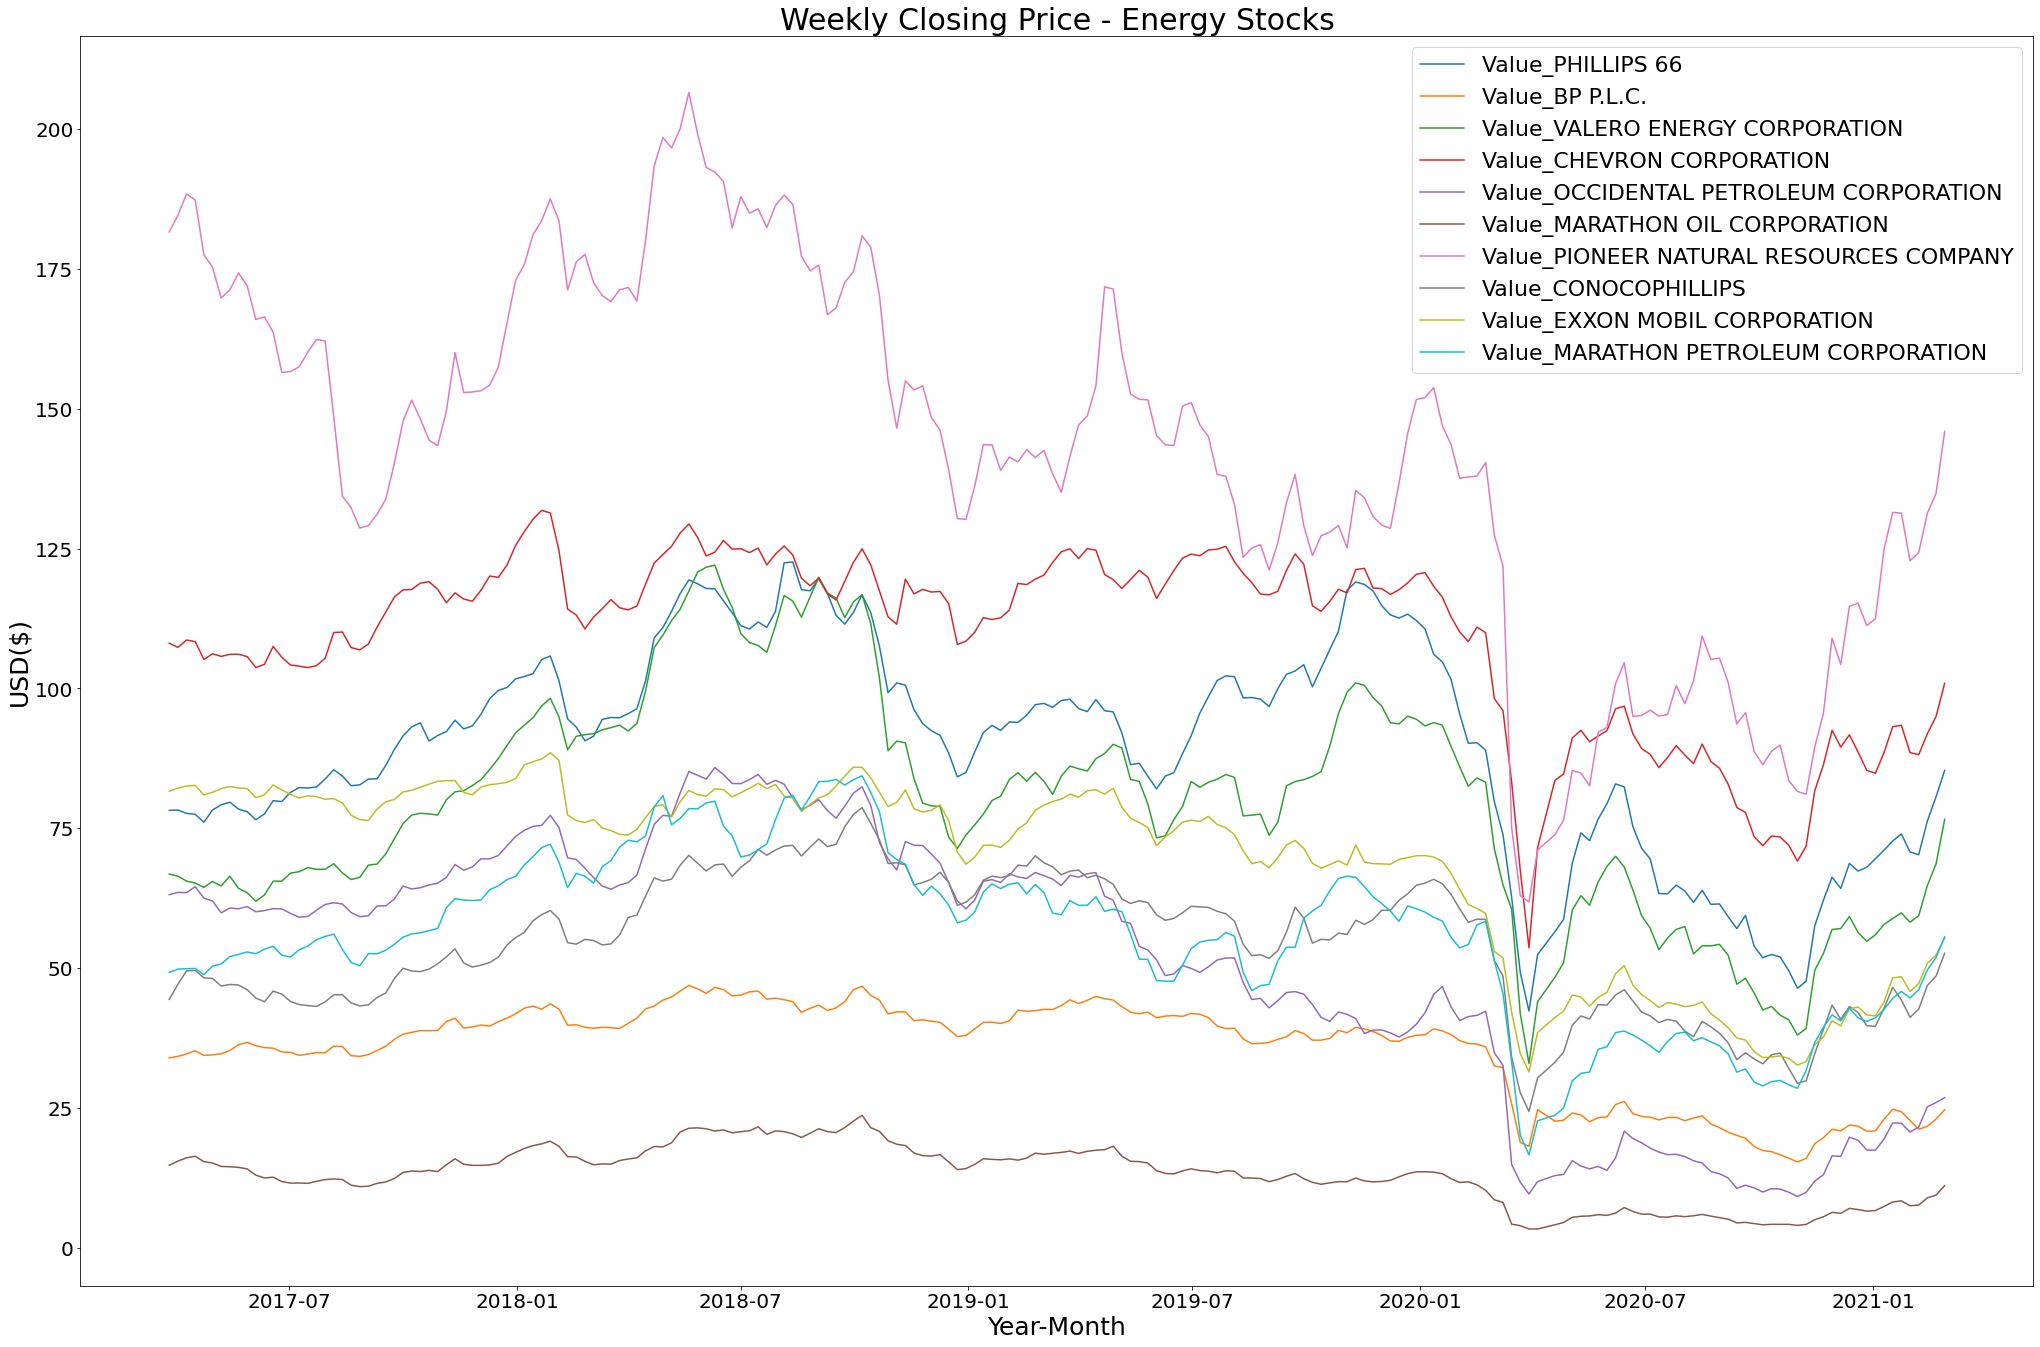

In [10]:
#preview of prices of time (actual)
import matplotlib.pyplot as plt
def plot_series(df, cols, title='Title', xlab=None, ylab=None): #from GA DSI Lesson 10.2 taught by Dan Wilhelm
    plt.figure(figsize=(35,23))
    for col in cols:
        plt.plot(df[col])
    plt.title(title, fontsize=30)
    plt.xlabel(xlab, fontsize=25)
    plt.ylabel(ylab, fontsize=25)
    plt.xticks(fontsize=20)
    #plt.xticks(np.arange(0,len(df)+1, 96),fontsize=18)
   # plt.set_xticks(np.arrange(0,len(df)+1, 48))
    plt.yticks(fontsize=20)

plot_series(df.dropna(), targets, title='Weekly Closing Price - Energy Stocks',
           xlab='Year-Month', ylab='USD($)')
plt.legend(targets, fontsize=22);
#plt.savefig('../images/all_closing_wout_mobility.png', dpi=200, bbox_inches='tight');

In [15]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
df.dropna(inplace=True)

In [16]:
#cycle through all 10 targets and model all of them, saving each collection of predictions
pred_list = {}
train_list = {}
test_list = {}
scores = {}
coefs = {}
for target in targets:
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=targets), #drop all target columns
                                                   df[target], #target is selected as y
                                                   test_size=.2, #80%/20% train/test split
                                                   shuffle=False) #predict most recent values
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test) #add intercepts
    lm = sm.OLS(y_train, X_train)
    lm_results = lm.fit()
    preds = lm_results.predict(X_test)
    train_list[target] = y_train #update dictionary with y_train
    test_list[target] = y_test #update dictionary with y_test
    pred_list[target] = preds #update dictionary with preds
    coefs[target] = lm_results.params #update dictionary with coefficient values
    scores[target] = mean_squared_error(y_test, lm_results.predict(X_test))**.5 #update dictionary with RMSE score
final_preds = pd.DataFrame(pred_list) #turn dictionary of lists into dataframe of preds
training = pd.DataFrame(train_list)
testing = pd.DataFrame(test_list)
coefs = pd.DataFrame(coefs)

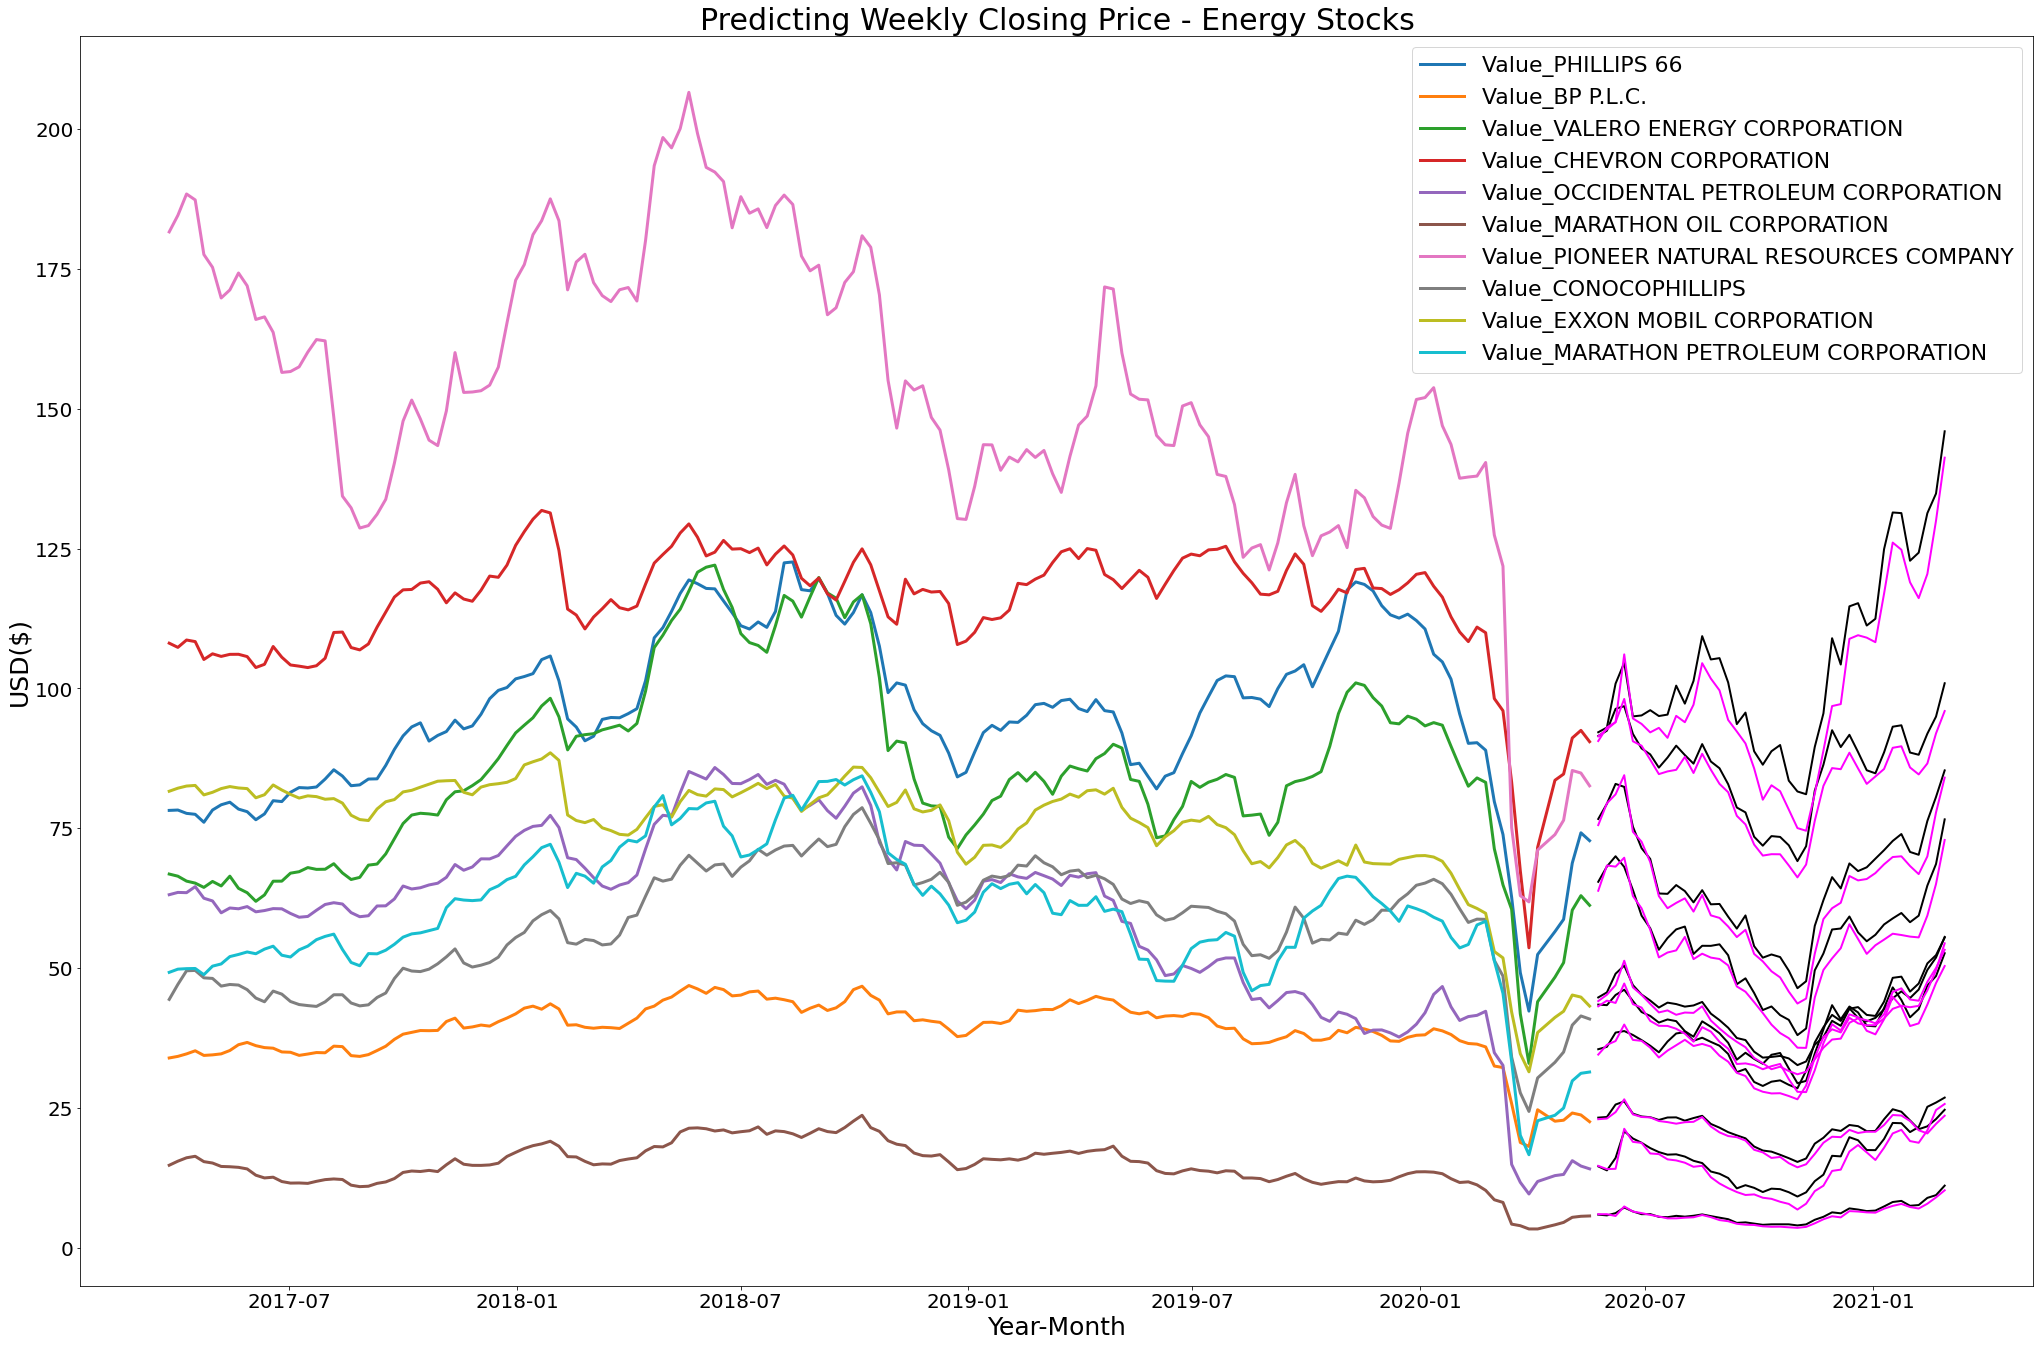

In [21]:
def plot_preds(ytraindf, ytestdf, pred_df, title='Title', xlab=None, ylab=None):
    plt.figure(figsize=(35,23))
    for col in ytraindf.columns:
        plt.plot(ytraindf[col], linewidth=3) #plot each ytrain
    for col in ytestdf.columns:
        plt.plot(ytestdf[col], color='black', linewidth=2) #plot each ytest
    for col in pred_df.columns:
        plt.plot(pred_df[col], color='magenta', linewidth=2) #plot the preds
    plt.title(title, fontsize=30)
    plt.xlabel(xlab, fontsize=25)
    plt.ylabel(ylab, fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

plot_preds(training, testing, final_preds, title='Predicting Weekly Closing Price - Energy Stocks',
           xlab='Year-Month', ylab='USD($)')
plt.legend(final_preds.columns, fontsize=22);
plt.savefig('../images/wout_mobility_preds_weekly.png', dpi=200, bbox_inches='tight')

In [19]:
pd.DataFrame(scores, index=('RMSE',)).T

,RMSE
Value_PHILLIPS 66,2.714695
Value_BP P.L.C.,0.806552
Value_VALERO ENERGY CORPORATION,2.719800
Value_CHEVRON CORPORATION,2.992004
Value_OCCIDENTAL PETROLEUM CORPORATION,1.673135
Value_MARATHON OIL CORPORATION,0.442103
Value_PIONEER NATURAL RESOURCES COMPANY,5.719371
Value_CONOCOPHILLIPS,1.650695
Value_EXXON MOBIL CORPORATION,1.804937
Value_MARATHON PETROLEUM CORPORATION,1.730009


In [20]:
l1 = [] #empty list
recurrance = [] #second list for recording all 50 top 5 features
for feature in coefs.columns:
    l2 = [] #empty list
    imp = list(dict(coefs[feature].abs().sort_values(ascending = False)[:5]).keys()) #top 5 biggest (abs value) coefs
    imp_dict = dict(coefs[feature]) #dictionary of all coefs for particular target
    for rec in imp:
        recurrance.append(rec) #add each feature's top 5 coefs to master list
    for n in range(len(imp)):
        l2.append(f'{imp[n]}: {round(imp_dict[imp[n]],2)}')
    l1.append(l2) #add list of top 5 to list
#print(pd.DataFrame(l1, index=coefs.columns, columns=['First', 'Second', 'Third', 'Fourth', 'Fifth']).to_markdown())
print(pd.DataFrame(recurrance, columns=['Feature_count'])['Feature_count'].value_counts().to_markdown())

|                                    |   Feature_count |
|:-----------------------------------|----------------:|
| lag_d_f_marathon_oil               |               8 |
| lag_i_f_greenhouse                 |               7 |
| const                              |               7 |
| lag_d_f_oil                        |               6 |
| lag_d_f_valero                     |               5 |
| lag_d_f_phillips_66                |               5 |
| lag_d_f_occidental_petroleum       |               4 |
| lag_i_f_carbon_footprint           |               3 |
| lag_d_g_oil                        |               2 |
| lag_d_g_valero                     |               1 |
| lag_Value_MARATHON OIL CORPORATION |               1 |
| lag_d_f_chevron                    |               1 |
